In [42]:
import numpy as np

def mean_filter_3x3(img):
    h, w = img.shape[:2]
    filtered = img.copy()
    for i in range(1, h-1):
        for j in range(1, w-1):
            neighbors = [
                img[i-1, j-1], img[i-1, j], img[i-1, j+1],
                img[i, j-1], img[i, j], img[i, j+1], 
                img[i+1, j-1], img[i+1, j], img[i+1, j+1]
            ]
            filtered[i, j] = np.mean(neighbors)
    return filtered

def mean_filter_5x5(img):
    h, w = img.shape[:2]
    filtered = img.copy()
    for i in range(2, h-2):
        for j in range(2, w-2):
            neighbors = [
                img[i-2, j-2], img[i-2, j-1], img[i-2, j], img[i-2, j+1], img[i-2, j+2],
                img[i-1, j-2], img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i-1, j+2],
                img[i, j-2], img[i, j-1], img[i, j], img[i, j+1], img[i, j+2],
                img[i+1, j-2], img[i+1, j-1], img[i+1, j], img[i+1, j+1], img[i+1, j+2],
                img[i+2, j-2], img[i+2, j-1], img[i+2, j], img[i+2, j+1], img[i+2, j+2]
            ]
            filtered[i, j] = np.mean(neighbors)
    return filtered

In [43]:
import cv2
image = cv2.imread("Sample image 1.jpg")

In [44]:
import matplotlib.pyplot as plt
def showing(img):
    plt.imshow(img,cmap='gray')
    plt.show()
    

Filtered image shape = 256 384
original image shape= 256 384


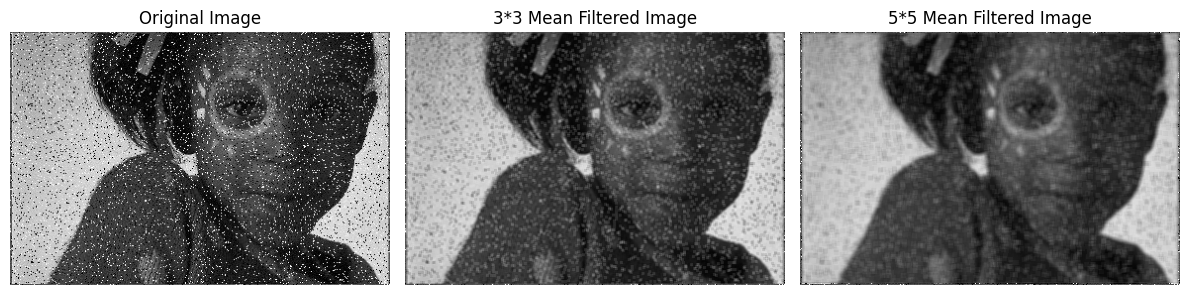

In [50]:
mean_filtered_3by3=mean_filter_3x3(image)
mean_filtered_5by5=mean_filter_5x5(image)


# showing(image)

# plt.subplot(1, 2, 1)
# plt.title("3*3 Mean Filtered Image")
# plt.imshow(mean_filtered_3by3, cmap='gray')

# plt.subplot(1, 2, 2)
# plt.title("5*5 Mean Filtered Image")
# plt.imshow(mean_filtered_5by5, cmap='gray')
# plt.show()

h1,w1=mean_filtered_3by3.shape[:2]
print("Filtered image shape =",h1,w1)

h2,w2=image.shape[:2]
print("original image shape=",h2,w2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
    
# Filtered Image (3x3)
plt.subplot(1, 3, 2)
plt.title("3*3 Mean Filtered Image")
plt.imshow(mean_filtered_3by3, cmap='gray')
plt.axis('off')
    
# Filtered Image (5x5)
plt.subplot(1, 3, 3)
plt.title("5*5 Mean Filtered Image")
plt.imshow(mean_filtered_5by5, cmap='gray')
plt.axis('off')
    
plt.tight_layout()
plt.show()

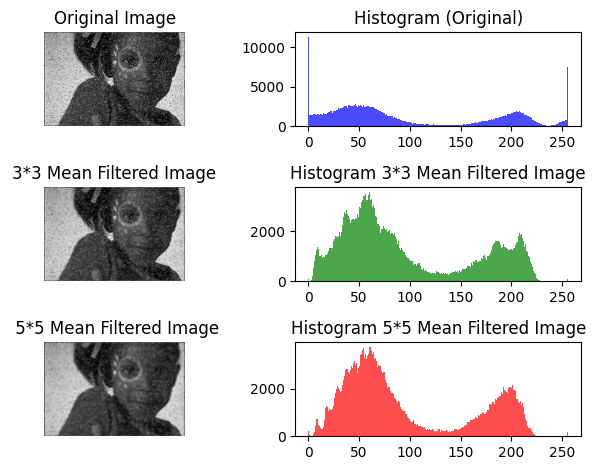

In [33]:
# Original image and histogram
plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Histogram (Original)")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(3, 2, 3)
plt.title("3*3 Mean Filtered Image")
plt.imshow(mean_filtered_3by3, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("Histogram 3*3 Mean Filtered Image")
plt.hist(mean_filtered_3by3.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

# 5x5 Filtered image and histogram
plt.subplot(3, 2, 5)
plt.title(" 5*5 Mean Filtered Image")
plt.imshow(mean_filtered_5by5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Histogram 5*5 Mean Filtered Image")
plt.hist(mean_filtered_5by5.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)

plt.tight_layout()
plt.show()

# High Pass Filter

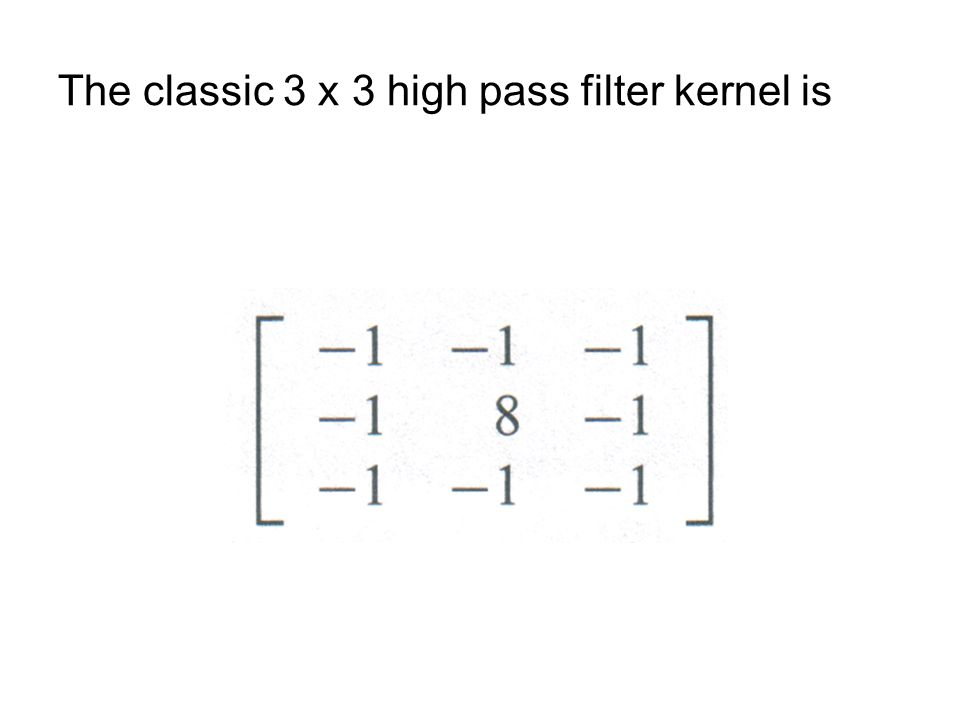

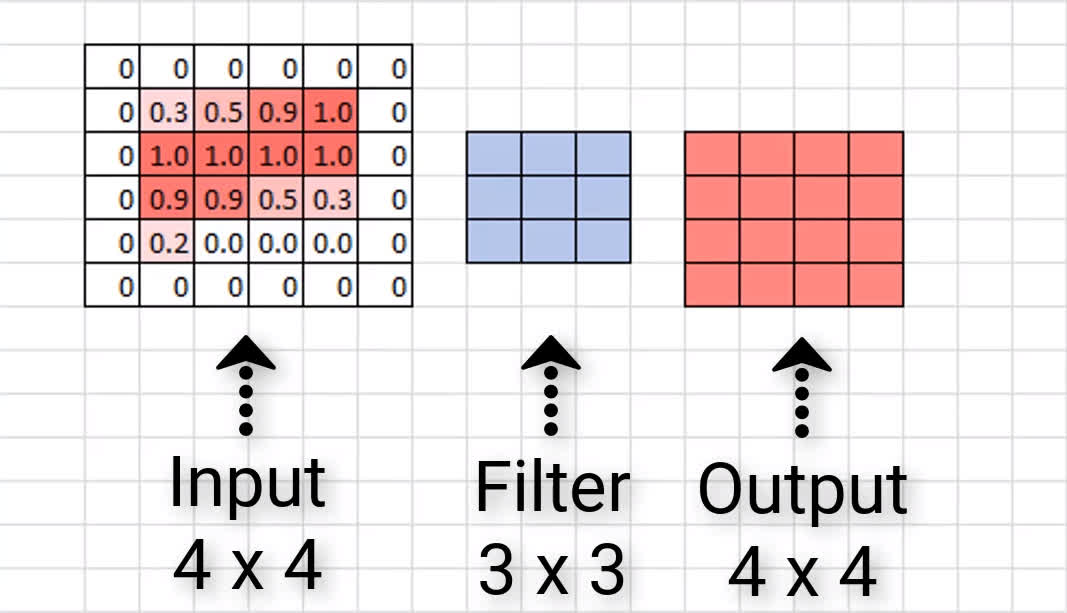

The central value (24) strongly emphasizes the current pixel's intensity relative to its neighbors.
below is a high pass kernel

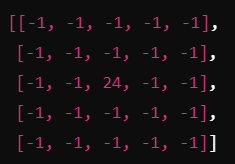

In [5]:
def pad_image(image, pad_size):
    """
    Pad the image with zeros for filtering
    """
    # Check if image is grayscale or color
    if len(image.shape) == 2:
        height, width = image.shape
        padded = np.zeros((height + 2*pad_size, width + 2*pad_size))
        padded[pad_size:height+pad_size, pad_size:width+pad_size] = image
    else:
        height, width, channels = image.shape
        padded = np.zeros((height + 2*pad_size, width + 2*pad_size, channels))
        padded[pad_size:height+pad_size, pad_size:width+pad_size, :] = image
    return padded

def highpass_filter_3x3(image):
    """
    Apply 3x3 highpass filter to image
    """
    # Create the highpass filter mask
    mask = np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]])
    
    # Handle both grayscale and color images
    if len(image.shape) == 2:
        height, width = image.shape
        channels = 1
        image_processed = image
    else:
        height, width, channels = image.shape
        image_processed = image
    
    padded_image = pad_image(image_processed, 1)
    
    if channels == 1:
        result = np.zeros((height, width))
    else:
        result = np.zeros((height, width, channels))
    
    # Apply the filter
    if channels == 1:
        for i in range(height):
            for j in range(width):
                neighborhood = padded_image[i:i+3, j:j+3]
                result[i, j] = np.sum(neighborhood * mask)
    else:
        for i in range(height):
            for j in range(width):
                for c in range(channels):
                    neighborhood = padded_image[i:i+3, j:j+3, c]
                    result[i, j, c] = np.sum(neighborhood * mask)
    
    return result

def highpass_filter_5x5(image):
    """
    Apply 5x5 highpass filter to image
    """
    # Create the highpass filter mask
    mask = np.ones((5, 5)) * -1
    mask[2, 2] = 24
    
    # Handle both grayscale and color images
    if len(image.shape) == 2:
        height, width = image.shape
        channels = 1
        image_processed = image
    else:
        height, width, channels = image.shape
        image_processed = image
    
    padded_image = pad_image(image_processed, 2)
    
    if channels == 1:
        result = np.zeros((height, width))
    else:
        result = np.zeros((height, width, channels))
    
    # Apply the filter
    if channels == 1:
        for i in range(height):
            for j in range(width):
                neighborhood = padded_image[i:i+5, j:j+5]
                result[i, j] = np.sum(neighborhood * mask)
    else:
        for i in range(height):
            for j in range(width):
                for c in range(channels):
                    neighborhood = padded_image[i:i+5, j:j+5, c]
                    result[i, j, c] = np.sum(neighborhood * mask)
    
    return result


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1832.0..2016.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5366.0..5968.0].


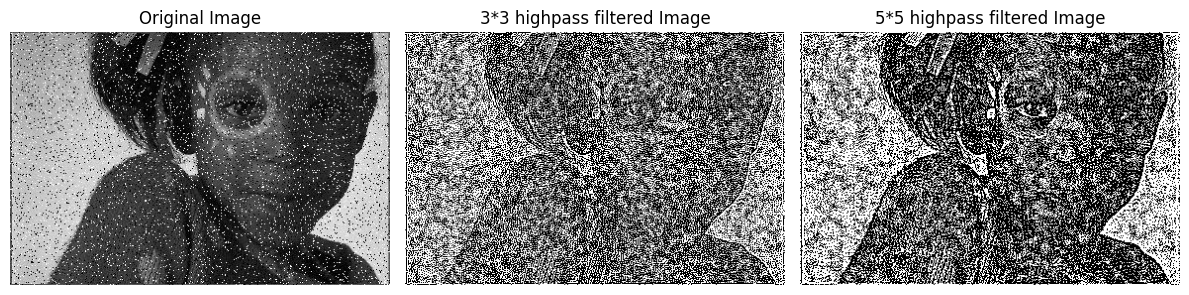

In [14]:
hp_3x3 = highpass_filter_3x3(image)
hp_5x5 = highpass_filter_5x5(image)

# plt.subplot(1, 2, 1)
# plt.title("3*3 highpass filtered Image")
# plt.imshow(hp_3x3, cmap='gray')

# plt.subplot(1, 2, 2)
# plt.title("5*5 highpass filtered Image")
# plt.imshow(hp_5x5, cmap='gray')
# plt.show()



plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
    
# Filtered Image (3x3)
plt.subplot(1, 3, 2)
plt.title("3*3 highpass filtered Image")
plt.imshow(hp_3x3, cmap='gray')
plt.axis('off')
    
# Filtered Image (5x5)
plt.subplot(1, 3, 3)
plt.title("5*5 highpass filtered Image")
plt.imshow(hp_5x5, cmap='gray')
plt.axis('off')
    
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1832.0..2016.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5366.0..5968.0].


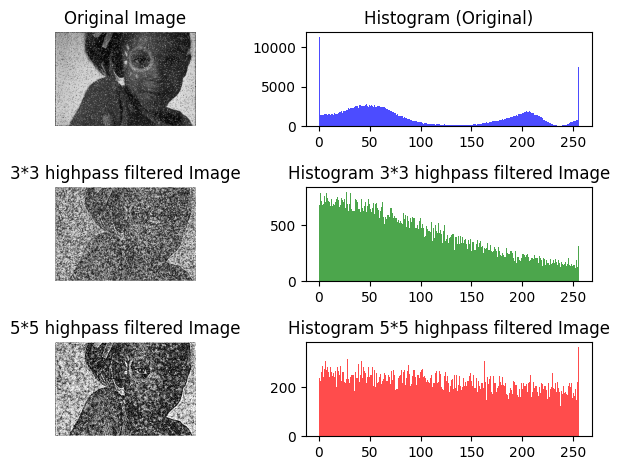

In [34]:
# Original image and histogram
plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Histogram (Original)")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(3, 2, 3)
plt.title("3*3 highpass filtered Image")
plt.imshow(hp_3x3, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("Histogram 3*3 highpass filtered Image")
plt.hist(hp_3x3.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

# 5x5 Filtered image and histogram
plt.subplot(3, 2, 5)
plt.title("5*5 highpass filtered Image")
plt.imshow(hp_5x5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Histogram 5*5 highpass filtered Image")
plt.hist(hp_5x5.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)

plt.tight_layout()
plt.show()

# Low Pass Filter

Padding

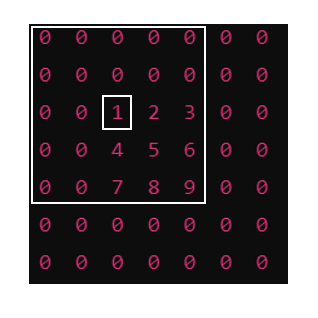

below is a Low pass kernel

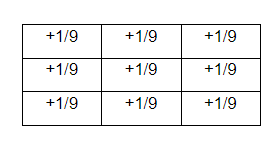

resource : https://cdn.diffractionlimited.com/help/maximdl/Low-Pass_Filtering.htm

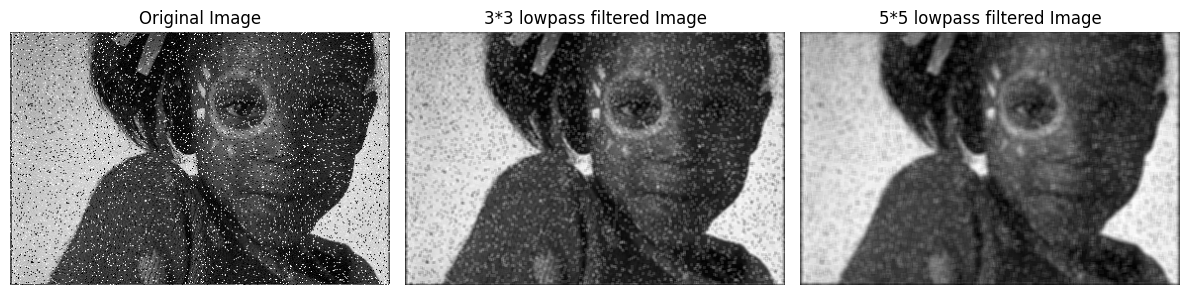

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def lowpass_filter(image, mask_size):
    # Create the low-pass filter kernel (mean filter)
    kernel = np.ones((mask_size, mask_size)) / (mask_size * mask_size)
    
    # Ensure the input image is 2D
    if len(image.shape) == 3:  # RGB Image
        image = np.mean(image, axis=2).astype(np.uint8)  # Convert to grayscale
    
    # Get image dimensions
    img_height, img_width = image.shape
    
    # Calculate padding size
    pad_size = mask_size // 2
    
    # Pad the image with zeros
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Initialize the output image
    filtered_image = np.zeros_like(image)
    
    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region of interest
            roi = padded_image[i:i+mask_size, j:j+mask_size]
            # Convolve with the kernel
            filtered_image[i, j] = np.sum(roi * kernel)
    
    return filtered_image


if __name__ == "__main__":

    # Apply 3x3 low-pass filter
    filtered_3x3 = lowpass_filter(image, 3)
    # Apply 5x5 low-pass filter
    filtered_5x5 = lowpass_filter(image, 5)
    
    # Plot the images
    plt.figure(figsize=(12, 4))
    
    # Original Grayscale Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    # Filtered Image (3x3)
    plt.subplot(1, 3, 2)
    plt.title("3*3 lowpass filtered Image")
    plt.imshow(filtered_3x3, cmap='gray')
    plt.axis('off')
    
    # Filtered Image (5x5)
    plt.subplot(1, 3, 3)
    plt.title("5*5 lowpass filtered Image")
    plt.imshow(filtered_5x5, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


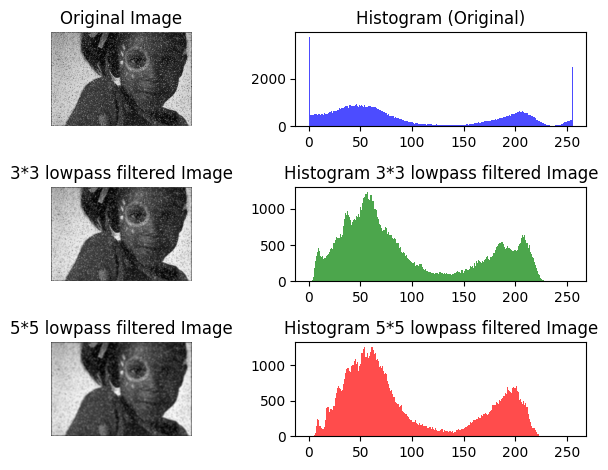

In [35]:
# Original image and histogram
plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Histogram (Original)")
plt.hist(example_image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(3, 2, 3)
plt.title("3*3 lowpass filtered Image")
plt.imshow(filtered_3x3, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("Histogram 3*3 lowpass filtered Image")
plt.hist(filtered_3x3.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

# 5x5 Filtered image and histogram
plt.subplot(3, 2, 5)
plt.title("5*5 lowpass filtered Image")
plt.imshow(filtered_5x5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Histogram 5*5 lowpass filtered Image")
plt.hist(filtered_5x5.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)

plt.tight_layout()
plt.show()

# bilateral filter

below is a matrix for understanding the kernel radius.

C: Represents the center of the kernel (0, 0)

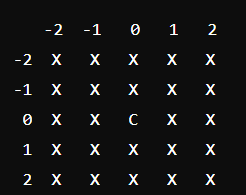

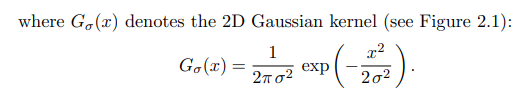

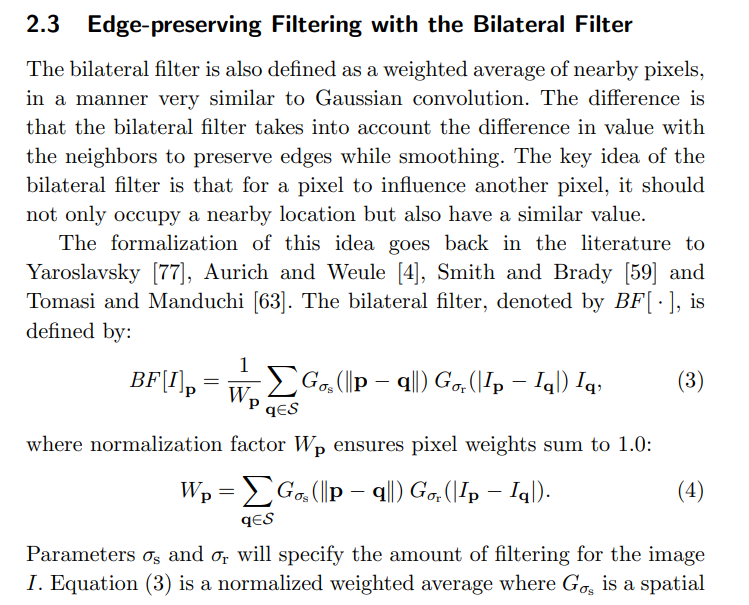

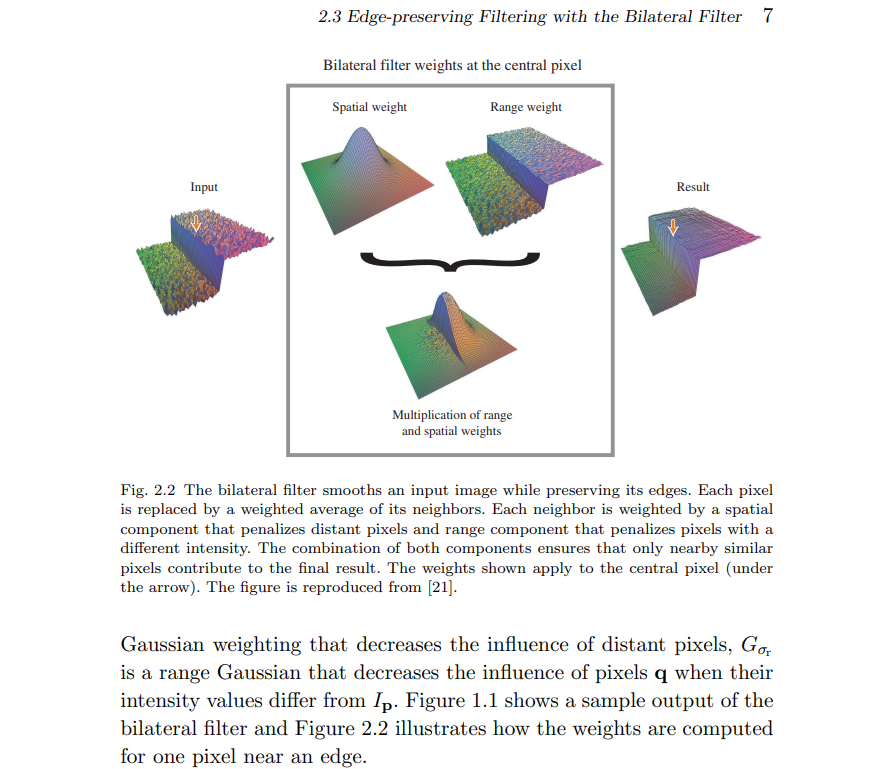

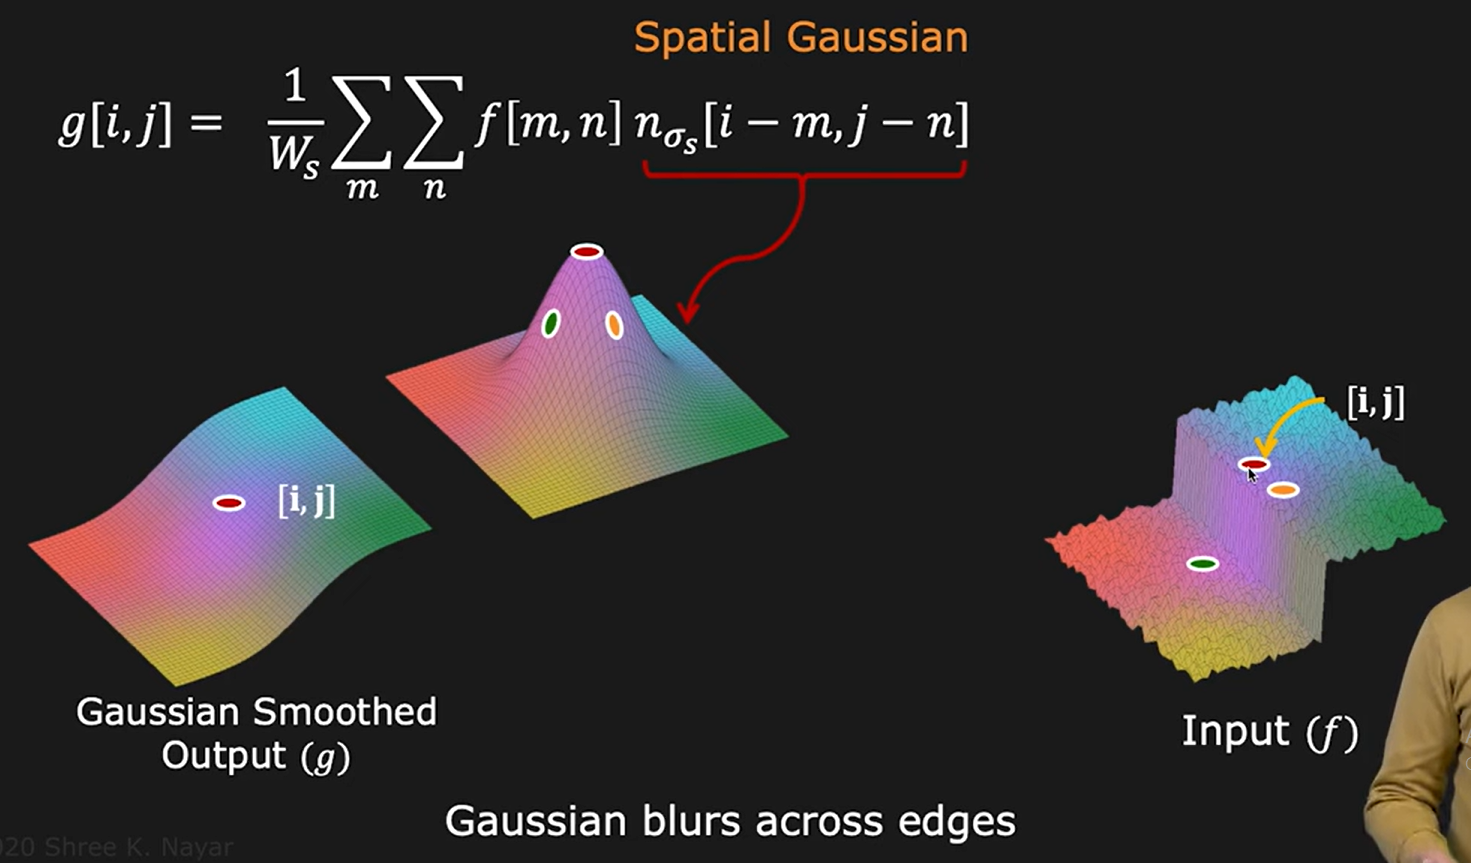

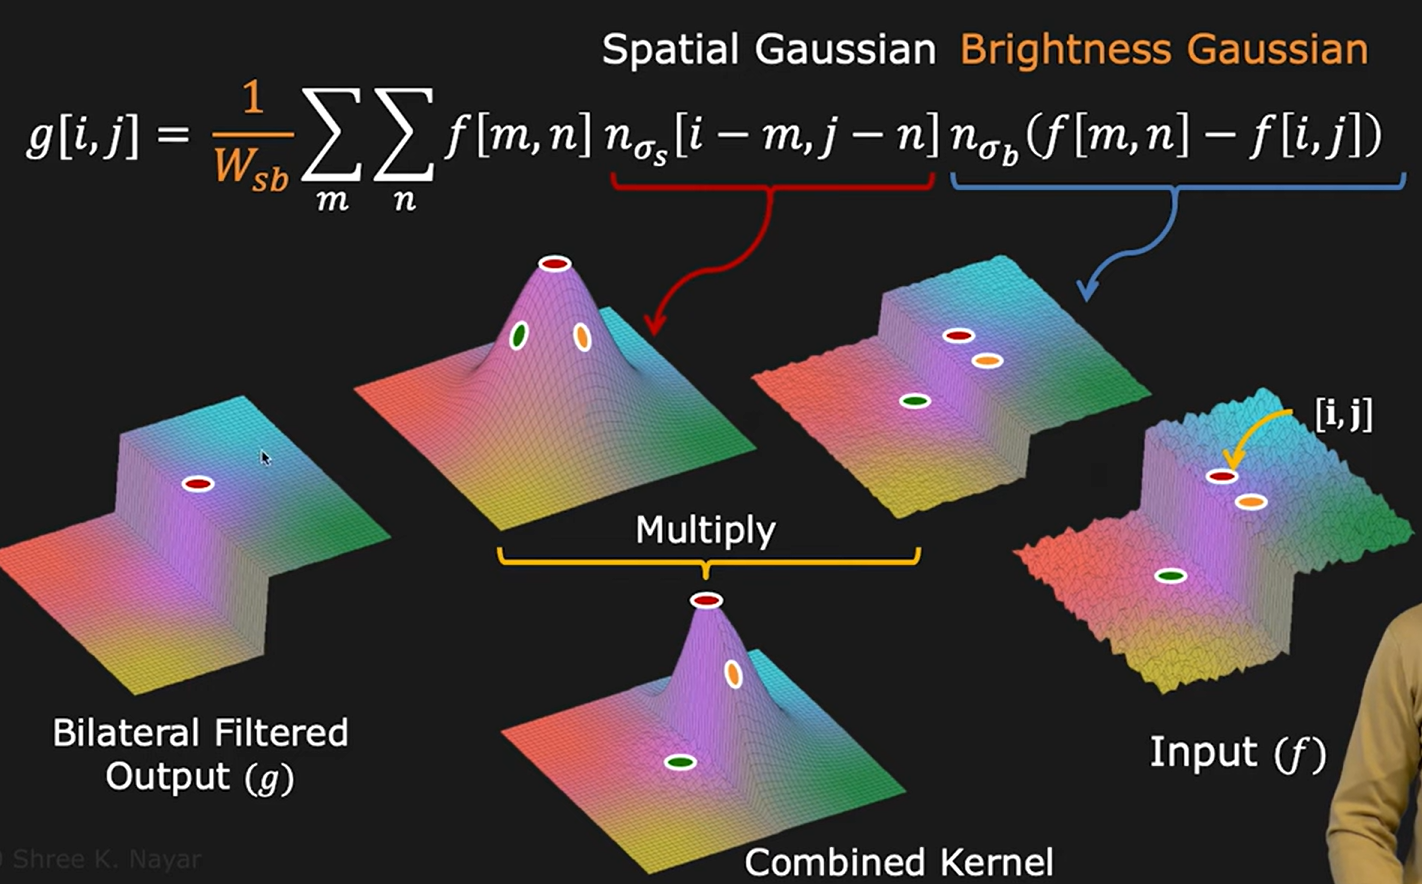

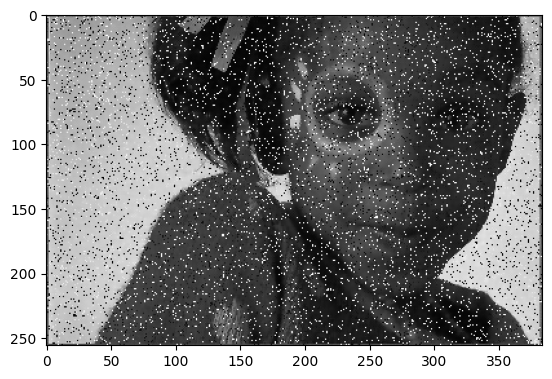

In [55]:
import cv2

# Apply bilateral filter
filtered_image_bil = cv2.bilateralFilter(image, d=5, sigmaColor=75, sigmaSpace=75)

plt.imshow(filtered_image_bil)
plt.show()

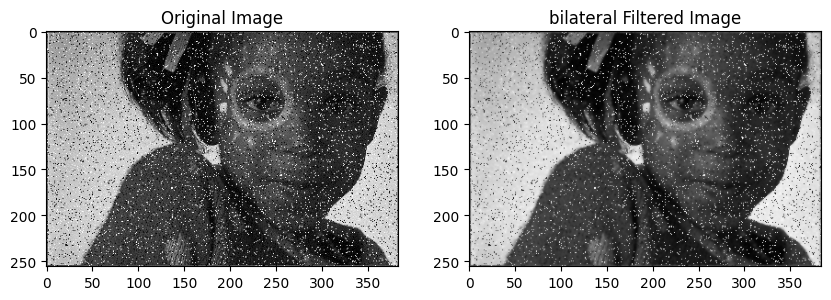

In [28]:
def bilateral_filter_manual(image, sigma_s, sigma_r):

    # Convert to grayscale if the input is RGB
    if len(image.shape) == 3:
        image = np.mean(image, axis=2).astype(np.float64)  # Ensure float64 precision

    # Convert to float64 for processing
    image = image.astype(np.float64)
    
    # Image dimensions
    height, width = image.shape
    
    # Output image
    filtered_image = np.zeros_like(image, dtype=np.float64)
    
    # Define kernel radius
    kernel_radius = 2  # For 5 × 5 kernel
    
    # Generate spatial Gaussian kernel
    spatial_kernel = np.zeros((5, 5))
    for i in range(-kernel_radius, kernel_radius + 1):
        for j in range(-kernel_radius, kernel_radius + 1):
            spatial_kernel[i + kernel_radius, j + kernel_radius] = np.exp(-(i**2 + j**2) / (2 * sigma_s**2))
    
    for x in range(height):
        for y in range(width):
            weighted_sum = 0.0
            normalization_factor = 0.0
            
            for i in range(-kernel_radius, kernel_radius + 1):
                for j in range(-kernel_radius, kernel_radius + 1):
                    xi = x + i
                    yj = y + j
                    
                    # Check if the neighboring pixel is within bounds
                    if 0 <= xi < height and 0 <= yj < width:
                        # Intensity Gaussian weight (prevent overflow by using float64)
                        intensity_diff = image[x, y] - image[xi, yj]
                        intensity_weight = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))
                        
                        # Combined weight
                        weight = spatial_kernel[i + kernel_radius, j + kernel_radius] * intensity_weight
                        
                        # Accumulate
                        weighted_sum += weight * image[xi, yj]
                        normalization_factor += weight
            
            # Normalize and assign the new pixel value
            filtered_image[x, y] = weighted_sum / normalization_factor
    
    return np.clip(filtered_image, 0, 255).astype(np.uint8)


sigma_s = 1
sigma_r = 100
filtered_image_bl = bilateral_filter_manual(image, sigma_s, sigma_r)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("bilateral Filtered Image")
plt.imshow(filtered_image_bl, cmap='gray')
plt.show()


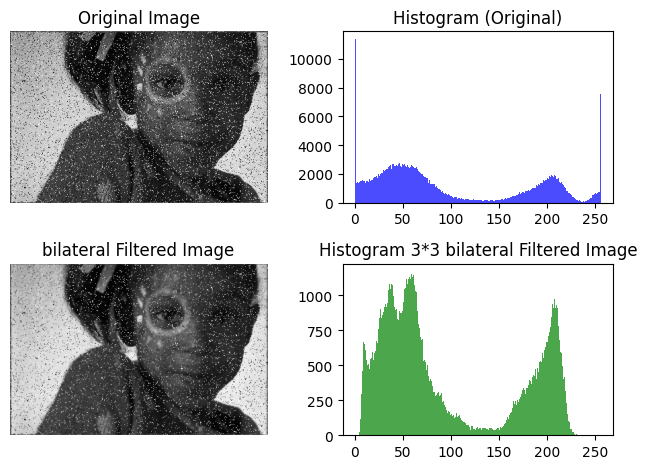

In [31]:
# Original image and histogram
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram (Original)")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(2, 2, 3)
plt.title("bilateral Filtered Image")
plt.imshow(filtered_image_bl, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram 3*3 bilateral Filtered Image")
plt.hist(filtered_image_bl.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

plt.tight_layout()
plt.show()

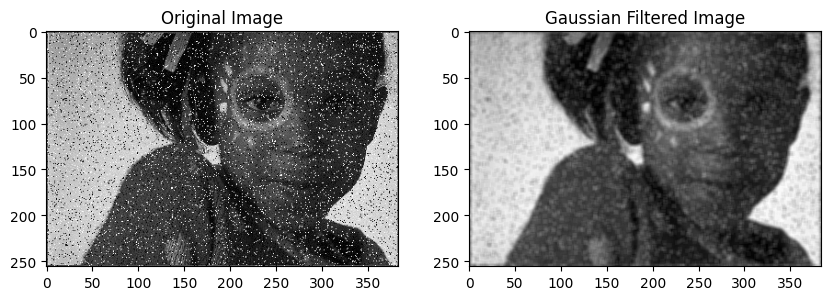

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size), dtype=np.float64)
    center = size // 2
    
    for x in range(size):
        for y in range(size):
            distance = (x - center)**2 + (y - center)**2
            kernel[x, y] = np.exp(-distance / (2 * sigma**2))
    
    kernel /= np.sum(kernel)  # Normalize the kernel
    return kernel

def gaussian_filter(image, sigma):
    # Convert to grayscale if the input is 3D (RGB)
    if len(image.shape) == 3:
        image = np.mean(image, axis=2).astype(np.float64)  # Convert to float64
    
    # Ensure the image is float64 for computation
    image = image.astype(np.float64)
    
    # Generate a 5x5 Gaussian kernel
    kernel_size = 5
    kernel = gaussian_kernel(kernel_size, sigma)
    
    # Convolve the image with the Gaussian kernel
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
    
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Example usage:
# Replace `input_image` with your actual image
# input_image = np.random.rand(100, 100) * 255  # Example grayscale image
sigma = 3
filtered_image_gsc = gaussian_filter(image, sigma)

# Visualize the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(filtered_image_gsc, cmap='gray')
plt.show()


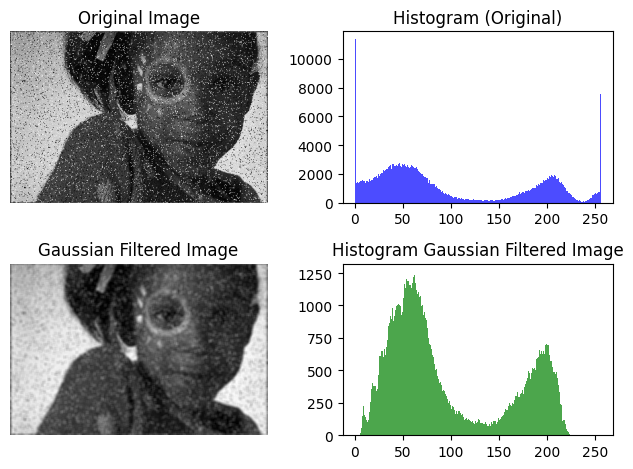

In [36]:
# Original image and histogram
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram (Original)")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(2, 2, 3)
plt.title("Gaussian Filtered Image")
plt.imshow(filtered_image_gsc, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram Gaussian Filtered Image")
plt.hist(filtered_image_gsc.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

plt.tight_layout()
plt.show()

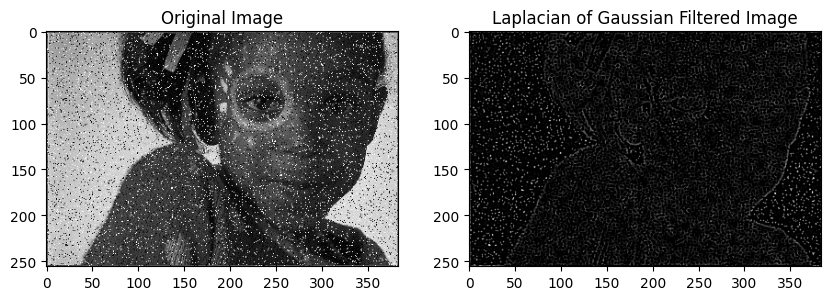

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def laplacian_of_gaussian_kernel(size, sigma):
    """
    Generate a Laplacian of Gaussian (LoG) kernel.
    
    Args:
        size (int): Size of the kernel (should be odd, e.g., 5).
        sigma (float): Standard deviation of the Gaussian distribution.
    
    Returns:
        np.ndarray: 2D LoG kernel.
    """
    kernel = np.zeros((size, size), dtype=np.float64)
    center = size // 2
    sigma2 = sigma ** 2
    
    for x in range(size):
        for y in range(size):
            distance = (x - center) ** 2 + (y - center) ** 2
            kernel[x, y] = (-1 / (np.pi * sigma2 ** 2)) * (1 - distance / (2 * sigma2)) * np.exp(-distance / (2 * sigma2))
    
    # Normalize the kernel to ensure zero sum (helps avoid DC bias)
    kernel -= kernel.mean()
    return kernel

def laplacian_of_gaussian_filter(image, sigma, kernel_size=5):
    # Convert to grayscale if the input is RGB
    if len(image.shape) == 3:
        image = np.mean(image, axis=2).astype(np.float64)
    
    # Ensure the image is float64 for computation
    image = image.astype(np.float64)
    
    # Generate LoG kernel
    kernel = laplacian_of_gaussian_kernel(kernel_size, sigma)
    
    # Convolve the image with the LoG kernel
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
    
    # Normalize and convert back to uint8
    filtered_image = np.clip(filtered_image, 0, 255)
    return filtered_image.astype(np.uint8)

# Example usage:
# Replace `input_image` with your actual image
# input_image = np.random.rand(100, 100) * 255  # Example grayscale image
sigma = 1.0  # Adjust sigma based on experimentation
filtered_image_lp = laplacian_of_gaussian_filter(image, sigma, kernel_size=5)

# Visualize the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Laplacian of Gaussian Filtered Image")
plt.imshow(filtered_image_lp, cmap='gray')
plt.show()


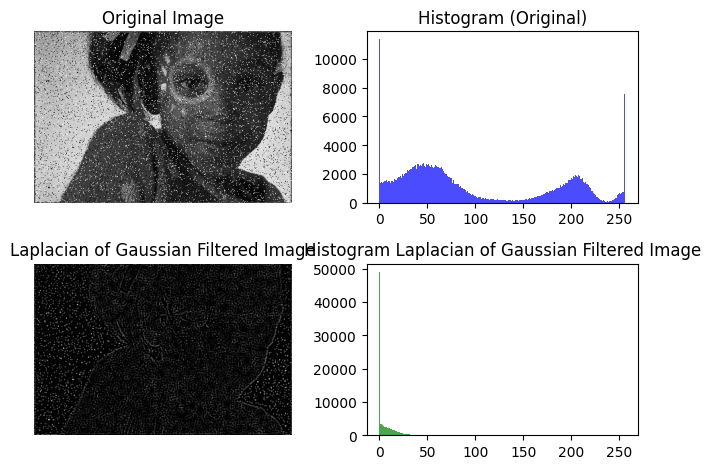

In [38]:
# Original image and histogram
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram (Original)")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(2, 2, 3)
plt.title("Laplacian of Gaussian Filtered Image")
plt.imshow(filtered_image_lp, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram Laplacian of Gaussian Filtered Image")
plt.hist(filtered_image_lp.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

plt.tight_layout()
plt.show()

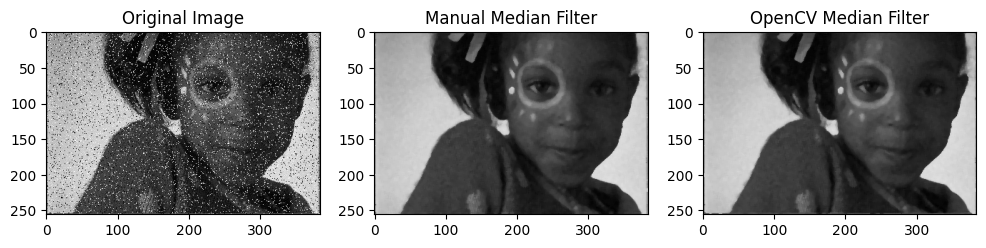

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median_filter_manual(image, window_size):
    """
    Apply a median filter to a grayscale image manually.
    
    Args:
        image (np.ndarray): Input 2D grayscale image.
        window_size (int): Size of the square window (must be odd, e.g., 3, 5).
    
    Returns:
        np.ndarray: Median-filtered image.
    """
    # Ensure the window size is odd
    assert window_size % 2 == 1, "Window size must be an odd number."
    
    # Padding size for border handling
    pad_size = window_size // 2
    
    # Pad the image to handle border pixels
    padded_image = np.pad(image, pad_size, mode='reflect')
    
    # Create an empty output image
    filtered_image = np.zeros_like(image)
    
    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the local window
            window = padded_image[i:i + window_size, j:j + window_size]
            # Compute the median of the window and assign it to the center pixel
            filtered_image[i, j] = np.median(window)
    
    return filtered_image


# Apply manual median filtering
window_size = 5  # Adjust based on noise level and desired smoothness
filtered_manual = median_filter_manual(image, window_size)

# Apply OpenCV's median filtering for comparison
filtered_opencv = cv2.medianBlur(image, window_size)

# Compare the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Manual Median Filter")
plt.imshow(filtered_manual, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("OpenCV Median Filter")
plt.imshow(filtered_opencv, cmap='gray')

plt.show()


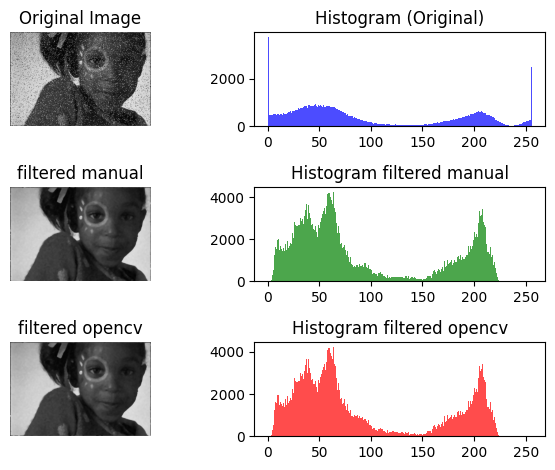

In [39]:
# Original image and histogram
plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Histogram (Original)")
plt.hist(example_image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)

# 3x3 Filtered image and histogram
plt.subplot(3, 2, 3)
plt.title("filtered manual")
plt.imshow(filtered_manual, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("Histogram filtered manual")
plt.hist(filtered_manual.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)

# 5x5 Filtered image and histogram
plt.subplot(3, 2, 5)
plt.title("filtered opencv")
plt.imshow(filtered_opencv, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Histogram filtered opencv")
plt.hist(filtered_opencv.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)

plt.tight_layout()
plt.show()